# **Importing Modules and Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# **Importing Datasets**

In [2]:
pd.set_option('display.max_columns', None) #display all columns

In [3]:
dtrain = pd.read_csv('datasets/UNSW/UNSW_NB15_testing-set.csv')
dtest = pd.read_csv('datasets/UNSW/UNSW_NB15_training-set.csv')

data = pd.concat([dtrain, dtest], ignore_index=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [5]:
data['label'].value_counts()

1    164673
0     93000
Name: label, dtype: int64

In [6]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [8]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,1.011203e+04,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [9]:
data['service'].replace('-',np.nan,inplace=True)

In [10]:
data.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [11]:
data.shape

(257673, 45)

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(116352, 45)

In [14]:
data['label'].value_counts()

1    87239
0    29113
Name: label, dtype: int64

In [15]:
data['attack_cat'].value_counts()

Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: attack_cat, dtype: int64

In [16]:
data['state'].value_counts()

INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: state, dtype: int64

In [17]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,81463,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,252,6.556516e+05,5562.915039,27,1,13.441272,56.755152,1376.971154,76.224305,255,3137145926,3197614932,255,0.154745,0.080450,0.074295,1137,44,1,0,1,1,1,1,1,2,0,0,1,1,1,0,Normal,0
256807,81467,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,252,6.501739e+05,5516.438965,27,1,13.969984,57.166383,1389.032442,82.519703,255,3567303131,4168480199,255,0.113208,0.081998,0.031210,1137,44,1,0,1,1,45,1,1,1,0,0,1,1,1,0,Normal,0
256859,81519,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,252,6.131881e+05,5202.630371,27,1,14.591627,63.407922,1526.290325,97.276484,255,1516200001,1237225352,255,0.104980,0.050635,0.054345,1137,44,1,0,2,1,23,1,1,2,0,0,1,1,2,0,Normal,0
256881,81541,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,252,7.247792e+05,6149.432129,27,1,12.379305,53.710461,1300.964841,83.333812,255,860363568,341738851,255,0.082721,0.041986,0.040735,1137,44,1,0,3,1,25,1,1,3,0,0,1,1,3,0,Normal,0


In [18]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('datasets/UNSW/UNSW_NB15_features.csv')

In [19]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [20]:
features['Type '] = features['Type '].str.lower()

In [21]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [22]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [23]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [24]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [25]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116352 entries, 3 to 257535
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 116352 non-null  int64  
 1   dur                116352 non-null  float64
 2   proto              116352 non-null  object 
 3   service            116352 non-null  object 
 4   state              116352 non-null  object 
 5   spkts              116352 non-null  int64  
 6   dpkts              116352 non-null  int64  
 7   sbytes             116352 non-null  int64  
 8   dbytes             116352 non-null  int64  
 9   rate               116352 non-null  float64
 10  sttl               116352 non-null  int64  
 11  dttl               116352 non-null  int64  
 12  sload              116352 non-null  float64
 13  dload              116352 non-null  float64
 14  sloss              116352 non-null  int64  
 15  dloss              116352 non-null  int64  
 16  si

In [27]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,81463,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,252,6.556516e+05,5562.915039,27,1,13.441272,56.755152,1376.971154,76.224305,255,3137145926,3197614932,255,0.154745,0.080450,0.074295,1137,44,1,0,1,1,1,1,1,2,0,0,1,1,1,0,Normal,0
256807,81467,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,252,6.501739e+05,5516.438965,27,1,13.969984,57.166383,1389.032442,82.519703,255,3567303131,4168480199,255,0.113208,0.081998,0.031210,1137,44,1,0,1,1,45,1,1,1,0,0,1,1,1,0,Normal,0
256859,81519,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,252,6.131881e+05,5202.630371,27,1,14.591627,63.407922,1526.290325,97.276484,255,1516200001,1237225352,255,0.104980,0.050635,0.054345,1137,44,1,0,2,1,23,1,1,2,0,0,1,1,2,0,Normal,0
256881,81541,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,252,7.247792e+05,6149.432129,27,1,12.379305,53.710461,1300.964841,83.333812,255,860363568,341738851,255,0.082721,0.041986,0.040735,1137,44,1,0,3,1,25,1,1,3,0,0,1,1,3,0,Normal,0


# **Data Visualization**

## **Binary Classification**

In [28]:
data['label'].value_counts()

1    87239
0    29113
Name: label, dtype: int64

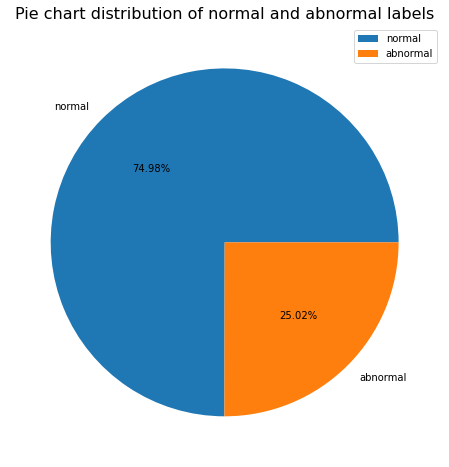

In [29]:
plt.figure(figsize=(8,8))
plt.pie(data['label'].value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

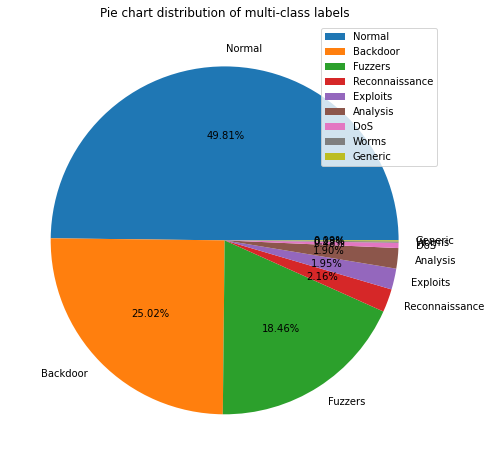

In [30]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **One hot encoding**

In [31]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [32]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [33]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [34]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
data.shape

(116352, 45)

In [36]:
data = pd.concat([data, data_cat],axis=1)

In [37]:
data.shape

(116352, 65)

In [38]:
data.drop(columns=cat_col,inplace=True)

In [39]:
data.shape

(116352, 62)

# **Data Normalization**


In [40]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
# num_col.remove('id')
num_col.remove('label')
print(num_col)

['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_ACC', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [41]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [42]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [44]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,0.000000,2.802759e-02,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,0.000150,0.000188,0.000545,1.092583e-02,0.006449,0.000234,0.010777,1.0,0.257772,0.243888,1.0,0.000000,0.000000,0.000000,0.006777,0.042667,0.000000,0.000000,0.000000,0.166667,0.017241,0.0,0.0,0.034483,0.25,0.25,0.000000,0.016949,0.000000,0.0,Normal,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.000046,3.488503e-02,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,0.000364,0.005264,0.001453,2.452283e-03,0.005367,0.002938,0.000229,1.0,0.424852,0.200410,1.0,0.087972,0.103000,0.054975,0.652108,0.052667,0.000000,0.000000,0.017241,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.000000,0.000000,0.000000,0.0,Normal,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,0.000068,3.333360e-08,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,0.000000,0.000000,0.000000,1.429367e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019578,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.051724,0.00,0.00,0.000000,0.016949,0.000000,0.0,Normal,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.000080,6.559318e-03,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,0.000869,0.000376,0.000363,3.125199e-03,0.003407,0.001919,0.000155,1.0,0.904076,0.718098,1.0,0.080709,0.115373,0.042914,0.032380,0.091333,0.005814,0.000016,0.034483,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.033333,0.000000,0.034483,0.0,Normal,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,0.000103,5.633661e-03,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,0.000236,0.000376,0.000182,2.516980e-03,0.004044,0.001741,0.000177,1.0,0.620722,0.819917,1.0,0.103597,0.107399,0.069747,0.042922,0.030000,0.005814,0.000000,0.086207,0.166667,0.000000,0.0,0.0,0.000000,0.00,0.00,0.033333,0.016949,0.034483,0.0,Normal,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

## **Binary Labels**

In [45]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [46]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [47]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [48]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [49]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [50]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [51]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [52]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [53]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [54]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [55]:
num_col.append('label')

## **Correlation Matrix for Binary Labels**

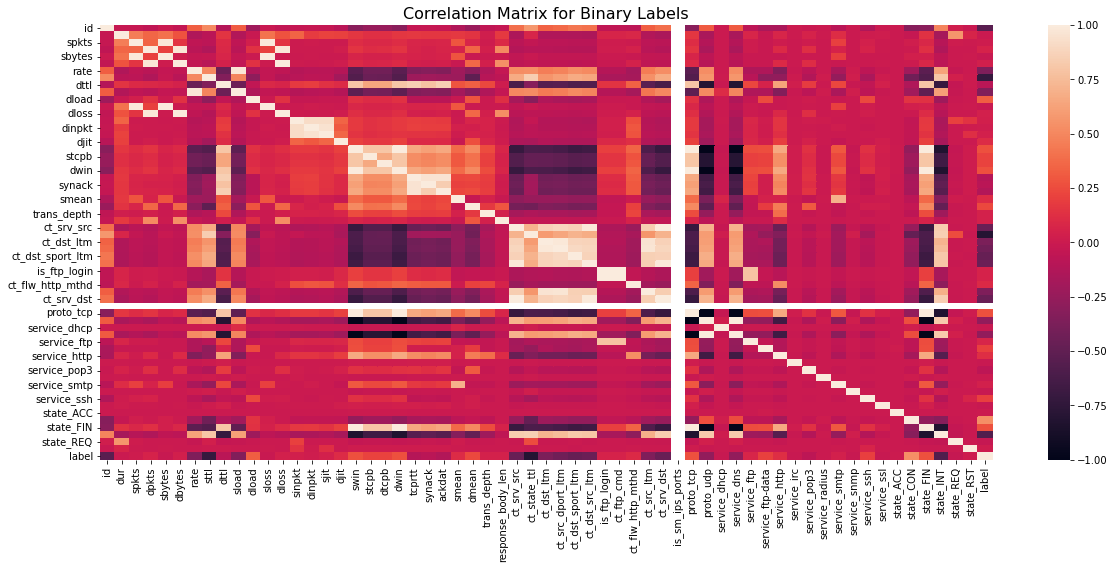

In [56]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## **Correlation Matrix for Multi-class Labels**

In [57]:
num_col = list(multi_data.select_dtypes(include='number').columns)

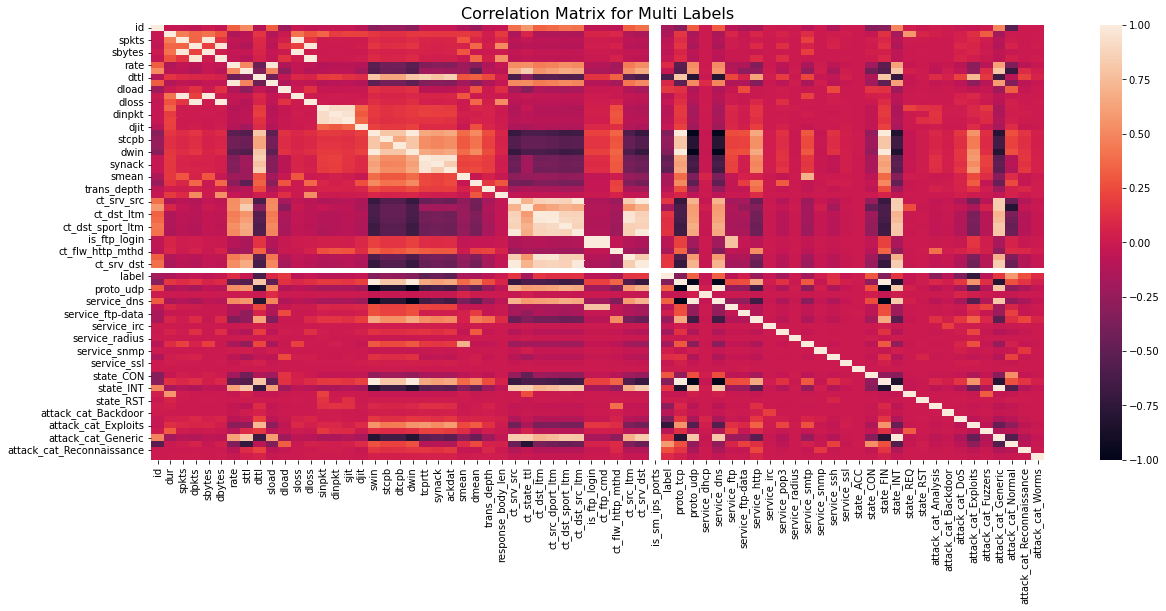

In [58]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()